<a href="https://colab.research.google.com/github/juanesarist/ProyectoDS_PartelII_Aristizabal/blob/main/ProyectoDS_PartelII_Aristizabal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Primera Entrega Data Science**


# **Data set "Global Road Accidents Dataset"**

Este conjunto de datos ofrece información sobre accidentes de tráfico de todo el mundo, con 40,000 filas y 30 características diversas. Incluye una variedad de factores como la gravedad del accidente, las condiciones meteorológicas, los vehículos involucrados, las características de los conductores y las regiones geográficas. Dirigido tanto a principiantes como a usuarios intermedios y avanzados, este conjunto es ideal para realizar análisis exploratorio de datos (EDA), ingeniería de características y entrenar modelos de aprendizaje automático con el objetivo de predecir la gravedad de los accidentes, las fatalidades y otros resultados importantes.

# Acceso a la base de datos metiante github

In [874]:
url = 'https://raw.githubusercontent.com/juanesarist/1-Entrega-Data-Science-1/refs/heads/main/road_accident_dataset.csv'


Se trae el dataset de la Url de github en RAW

In [875]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Se importan las librerias a utilizar

In [876]:

df = pd.read_csv(url, sep = ',')
df.head(5).round(2)


,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,...,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
0,USA,2002,October,Tuesday,Evening,Rural,Street,Windy,220.41,1,...,2,58.63,7412.75,Wet,Weather,4,40499.86,22072.88,Europe,3866.27
1,UK,2014,December,Saturday,Evening,Urban,Street,Windy,168.31,3,...,1,58.04,4458.63,Snow-covered,Mechanical Failure,3,6486.60,9534.40,North America,2333.92
2,USA,2012,July,Sunday,Afternoon,Urban,Highway,Snowy,341.29,4,...,4,42.37,9856.92,Wet,Speeding,4,29164.41,58009.15,South America,4408.89
3,UK,2017,May,Saturday,Evening,Urban,Main Road,Clear,489.38,2,...,3,48.55,4958.65,Icy,Distracted Driving,3,25797.21,20907.15,Australia,2810.82
4,Canada,2002,July,Tuesday,Afternoon,Rural,Highway,Rainy,348.34,1,...,4,18.32,3843.19,Icy,Distracted Driving,8,15605.29,13584.06,South America,3883.65


In [877]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      40000 non-null  object 
 1   Year                         40000 non-null  int64  
 2   Month                        40000 non-null  object 
 3   Day of Week                  40000 non-null  object 
 4   Time of Day                  40000 non-null  object 
 5   Urban/Rural                  40000 non-null  object 
 6   Road Type                    40000 non-null  object 
 7   Weather Conditions           40000 non-null  object 
 8   Visibility Level             40000 non-null  float64
 9   Number of Vehicles Involved  40000 non-null  int64  
 10  Speed Limit                  40000 non-null  int64  
 11  Driver Age Group             40000 non-null  object 
 12  Driver Gender                40000 non-null  object 
 13  Driver Alcohol L

Se observa que no se encuentran datos nulos

# Descripcion de atributos


* Country: Pais en el que ocurrio el accidente
* Year: Año en que ocurrio el accidente
* Month: Mes en el que ocurrio el accidente
* Day of Week: Dia de la semana que ocurrio el accidente
* Time of Day: Parte del dia en la que ocurrio el accidente
* Urban/Rural: Si fue en zona urbana o rural
* Road Type: Tipo de carretera
* Weather Conditions: Condiciones climaticas
* Visibility Level: Nivel de visibilidad durande la conduccion
* Number of Vehicles Involved: Numero de carros involucrados en el accidente
* Speed Limit: Limite de velocidad
* Driver Age Group: Grupo de edad a la que pertenece el conductor
* Driver Gender: Genero del conductor
* Driver Alcohol Level: Nivel de alcohol del conductor
* Driver Fatigue: Cansancio del conductor
* Vehicle Condition: Condiciones del vehiculo
* Pedestrians Involved: Peatones involucrados
* Cyclists Involved: Ciclistas involucrados
* Accident Severity: Severidad del accidente
* Number of Injuries: Numero de lesionados
* Number of Fatalities: Numero de fallecimientos
* Emergency Response Time: Tiempo de respuesta a la emergencia en minutos
* Traffic Volume: Volumen de trafico
* Road Condition: Condiciones de la via
* Accident Cause: Causa del accidente
* Insurance Claims: Reclamos del seguro
* Medical Cost: Costo medico
* Economic Loss: Perdida economica
* Region: Continente
* Population Density: Densidad poblacional de la ubicacion

# Objetivos



1.   Analizar cuales son las causas principales de accidente por pais segun rango de edad
2.   Ver la severidad de los accidentes segun la edad del conductor
3.  Buscar cual es el porcentaje de accidentes por pais
4. Analizar si el genero influye en las muertes en accidentes por regiones
5. Ver cual es el pais que mas fallecimientos tuvo por accidentes y como se dieron a medida del paso de los años



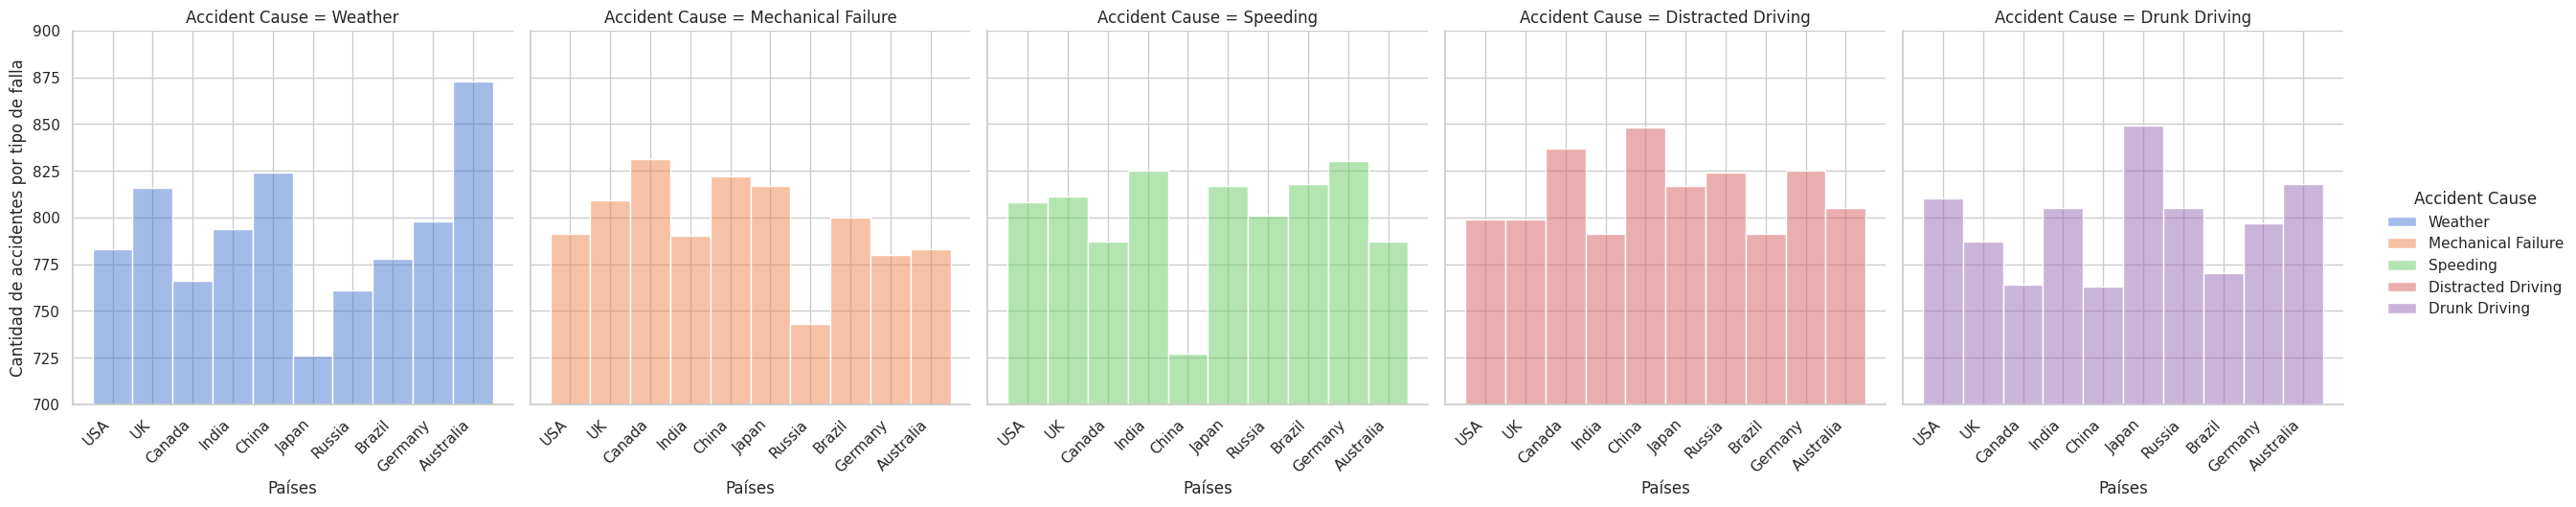

In [878]:

g = sns.displot(data=df, x='Country', hue='Accident Cause', col='Accident Cause')
g.set_axis_labels('Países', 'Cantidad de accidentes por tipo de falla')
g.set(ylim=(700, 900))
for ax in g.axes.flat:
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

Se saco una grafica en la cual se ve la cantidad de accidentes por paises pero dividido entre las causas del accidente, se puede evidenciar que en cada pais varian mucho la cantidad de accidentes segun sus causas

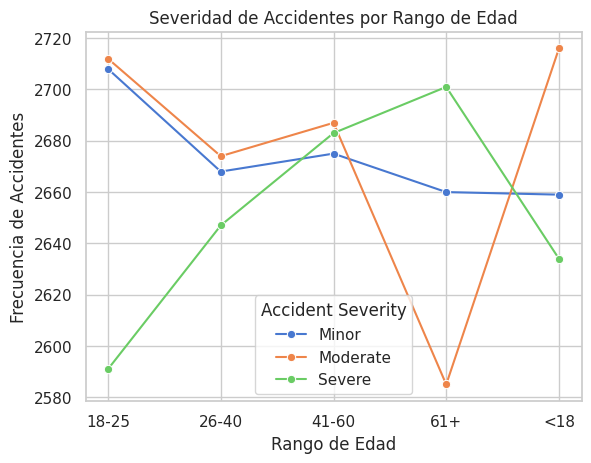

In [879]:
frecuencias = df.groupby(['Driver Age Group', 'Accident Severity']).size().reset_index(name='Frecuencia')
g = sns.lineplot(data=frecuencias, x='Driver Age Group', y='Frecuencia', hue='Accident Severity', marker='o')
plt.xlabel('Rango de Edad')
plt.ylabel('Frecuencia de Accidentes')
plt.title('Severidad de Accidentes por Rango de Edad')

plt.show()

Se analiza como varia la severidad del accidente segun el rango de edad y se puede evidenciar que a medida que aumenta la edad los accidentes son mas severos

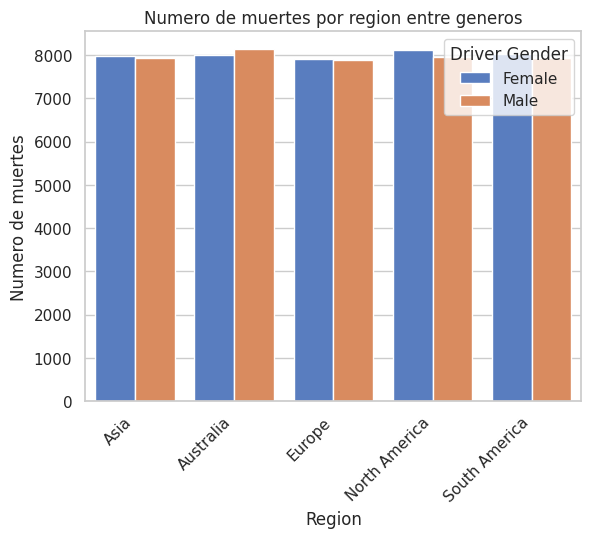

In [880]:

cant_muert = df.groupby(['Driver Gender', 'Region'])['Number of Fatalities'].sum().reset_index()
sns.barplot(data=cant_muert, x='Region', y='Number of Fatalities', hue = 'Driver Gender' )
plt.xlabel('Region')
plt.ylabel('Numero de muertes')
plt.title('Numero de muertes por region entre generos')
plt.xticks(rotation=45, ha='right')
plt.show()

En esta grafica se realizo un analisis de la cantidad de muertes producidas por accidentes en las diferentes regiones causadas por hombres o mujeres, se puede ver que la variacion en la cantidad de accidentes fatales no es significativa segun el genero, los resultados son muy similares independiente del genero y la region.

Country
Australia    4066
Germany      4030
Japan        4026
UK           4022
India        4005
USA          3991
Canada       3985
China        3984
Brazil       3957
Russia       3934
Name: count, dtype: int64


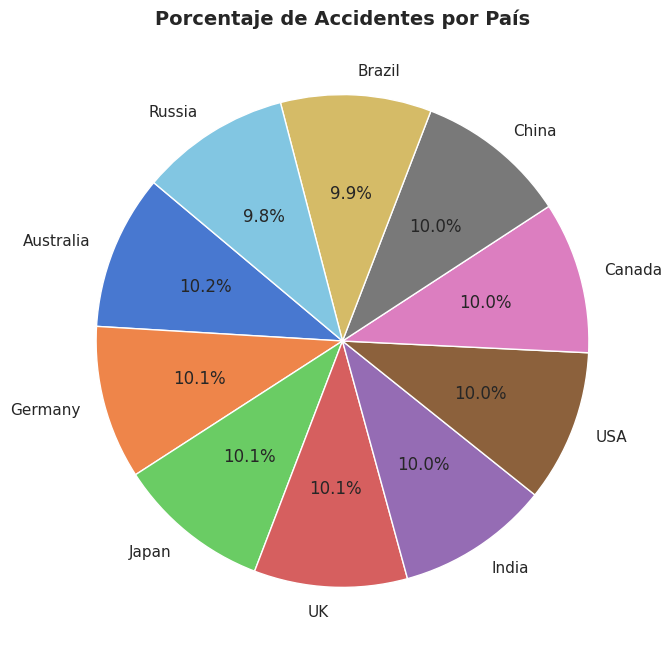

In [881]:
accidentes_por_pais = df['Country'].value_counts()
print(accidentes_por_pais)

plt.figure(figsize=(8, 8))
plt.pie(accidentes_por_pais, labels=accidentes_por_pais.index, autopct='%1.1f%%', startangle=140)

plt.title('Porcentaje de Accidentes por País', fontsize=14, fontweight='bold')
plt.show()

Se realizo un diagrama de torta con el fin de observar que porcentaje representa la cantidad de accidentes analizados segun su pais y se pudo observar que en general la cantidad de accidentes en cada pais es muy similar, encontrando variaciones en porcentaje de solo 0.4%

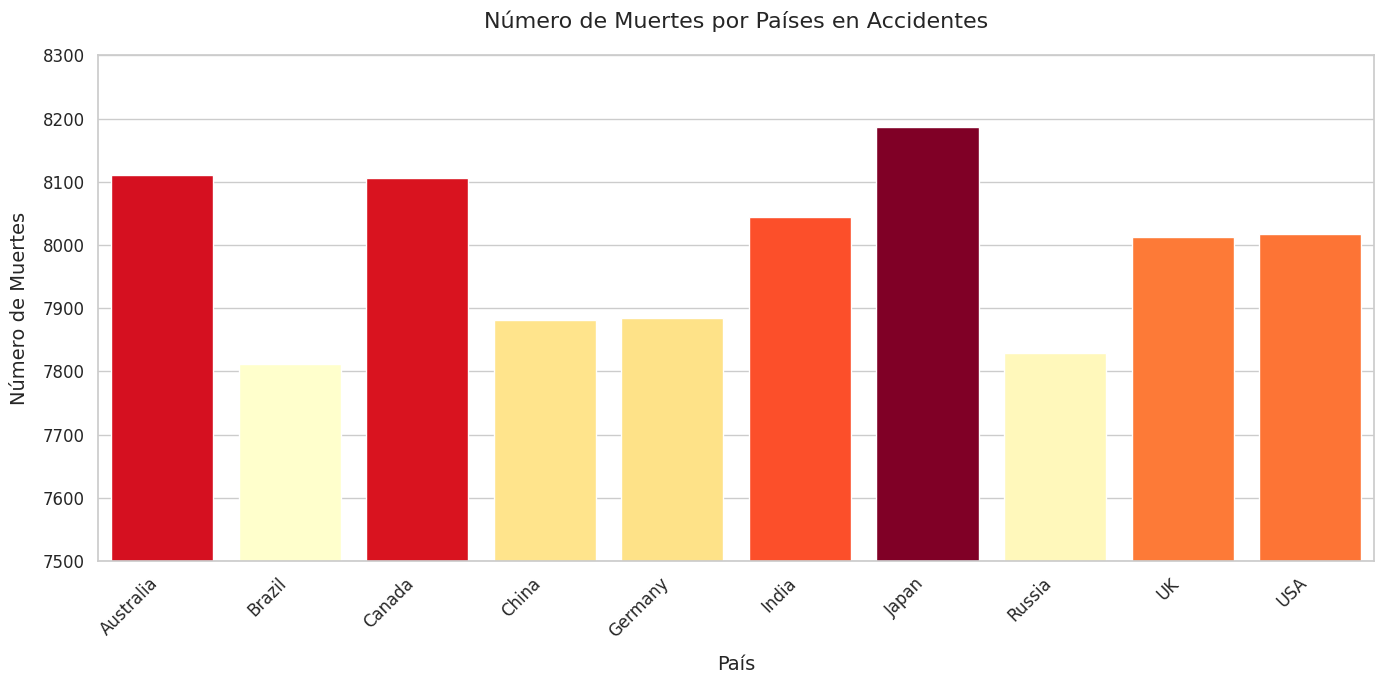

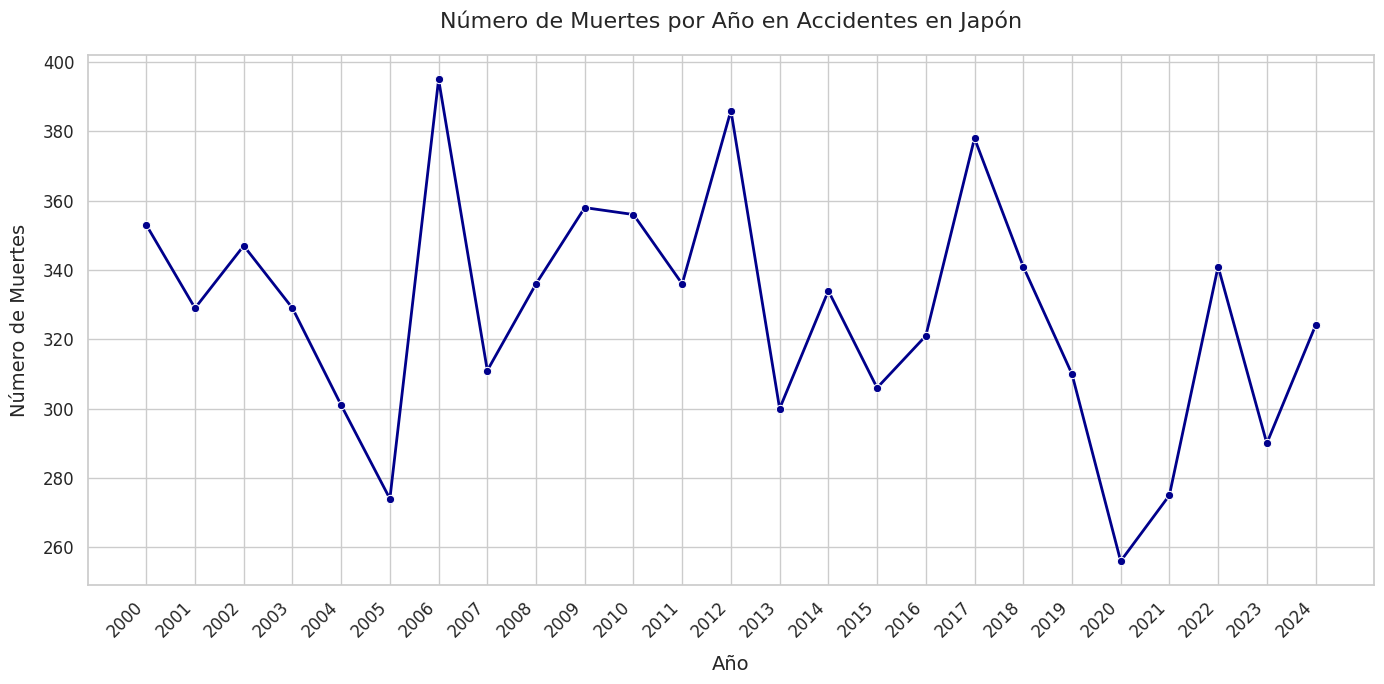

In [882]:
cant_muert_total = df.groupby([ 'Country'])['Number of Fatalities'].sum().reset_index()
muert_japan = df.query('Country == "Japan"')
cant_muert_japan = muert_japan.groupby(['Year'])['Number of Fatalities'].sum().reset_index()

sns.set_theme(style="whitegrid", palette="muted")

plt.figure(figsize=(14, 7))

ax = sns.barplot(data=cant_muert_total, x='Country', y='Number of Fatalities')

cmap = mpl.colormaps['YlOrRd']
norm = mpl.colors.Normalize(vmin=cant_muert_total['Number of Fatalities'].min(), vmax=cant_muert_total['Number of Fatalities'].max())

for p in ax.patches:
    color = cmap(norm(p.get_height()))
    p.set_facecolor(color)

plt.ylim(7500, 8300)

plt.xlabel('País', fontsize=14, labelpad=10)
plt.ylabel('Número de Muertes', fontsize=14, labelpad=10)
plt.title('Número de Muertes por Países en Accidentes', fontsize=16, pad=20)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()


plt.figure(figsize=(14, 7))
sns.lineplot(data=cant_muert_japan, x='Year', y='Number of Fatalities', marker='o', color='darkblue', linewidth=2)

plt.xticks(cant_muert_japan['Year'], rotation=45, ha='right', fontsize=12)

plt.xlabel('Año', fontsize=14, labelpad=10)
plt.ylabel('Número de Muertes', fontsize=14, labelpad=10)
plt.title('Número de Muertes por Año en Accidentes en Japón', fontsize=16, pad=20)

plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

Mediante las graficas anteriores se analizo inicialmente cuantas muertes se habian producido por accidentes en cada pais, siendo Japon el pais que mas muertes presenta y Brazil el que menos.
Luego se procede a analizar como varian las muertes en Japon a medida q han transcurrido los años, viendo que no estan en un constante aumento sino que tienen constantes variaciones en los diferentes años.


# **Conclusiones**



*   Con python se puede analizar muchos tipos de data sets y estas pueden ser manipuladas segun a necesidad
*   El uso de matplot es ideal para graficos simples y de mas bajo nivel, pero en los cuales se puede ver la informacion clara y crear graficos mas complejos sun lo que se necesite
*  Matplot permite una personalizacion muy completa de los diferentes graficos
*  El uso de seaborn permite una creacion mas sencilla (menos lineas de codigo) y el desarrollo de graficos mucho mas complejos y atractivos
*  El analisis de datos mediante python permite analizar cualquier tipo de informacion presente en la base de datos, por lo que es muy util para cualquier ambito laboral y personal
* Se pueden realizar anales desde cantidades por elemento hasta variaciones en el tiempo mediante graficos de puntos y lineas.



# Entrega Final

Se importan nuevamente todas las librerias necesarias con el fin de que no falte nada para el analisis

In [883]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

Eliminamos columnas que no aportan a la predicción

In [884]:
cols_to_drop = ['Country', 'Region', 'Number of Injuries']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

Convertimos variables categóricas a numéricas con Label Encoding

In [885]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Se verifica que no hayan valores nulos en el dataset

In [886]:
print(df.isna().sum())

Year                           0
Month                          0
Day of Week                    0
Time of Day                    0
Urban/Rural                    0
Road Type                      0
Weather Conditions             0
Visibility Level               0
Number of Vehicles Involved    0
Speed Limit                    0
Driver Age Group               0
Driver Gender                  0
Driver Alcohol Level           0
Driver Fatigue                 0
Vehicle Condition              0
Pedestrians Involved           0
Cyclists Involved              0
Accident Severity              0
Number of Fatalities           0
Emergency Response Time        0
Traffic Volume                 0
Road Condition                 0
Accident Cause                 0
Insurance Claims               0
Medical Cost                   0
Economic Loss                  0
Population Density             0
dtype: int64


Definimos la variable objetivo: si el accidente fue fatal o no

In [887]:
df['Fatal_Accident'] = (df['Number of Fatalities'] > 0).astype(int)
df.drop(columns=['Number of Fatalities'], inplace=True)

Separar features y target

In [888]:
X = df.drop(columns=['Fatal_Accident'])
y = df['Fatal_Accident']

Aplicamos SMOTE para balancear las clases

In [889]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

Dividimos los datos en conjunto de entrenamiento y prueba

In [890]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test


,Fatal_Accident
13320,1
21623,1
49548,0
36285,1
48622,0
...,...
7621,1
53514,0
1703,1
27505,1


Estandarizamos los datos para mejorar el desempeño del modelo

In [891]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Entrenamos un modelo de Random Forest

In [892]:
model = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

Realizamos predicciones

In [893]:
y_pred = model.predict(X_test)

Evaluamos el modelo

In [894]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

Mostramos los resultados

In [895]:
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.7792
Confusion Matrix:
 [[4652 1824]
 [1003 5327]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.72      0.77      6476
           1       0.74      0.84      0.79      6330

    accuracy                           0.78     12806
   macro avg       0.78      0.78      0.78     12806
weighted avg       0.78      0.78      0.78     12806



Visualización de la matriz de confusión

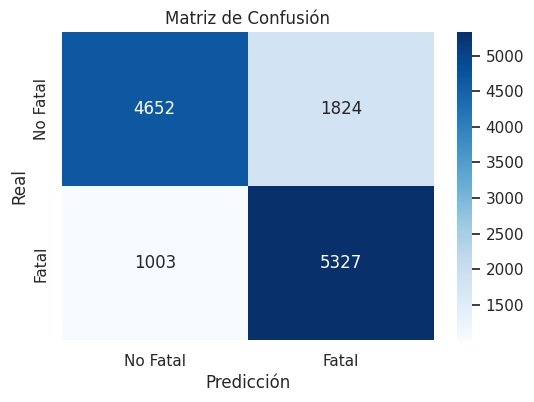

In [896]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fatal', 'Fatal'], yticklabels=['No Fatal', 'Fatal'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# **Conclusiones**



*   El modelo desarrollado para predecir la fatalidad de un accidente automovilístico alcanzó una precisión del 77.92%, lo que indica un desempeño aceptable, aunque con margen de mejora. La combinación de Random Forest como algoritmo de clasificación y SMOTE para el balanceo de clases permitió mejorar la calidad de las predicciones y abordar el problema del desbalance en los datos, asegurando que el modelo no favorezca una categoría sobre otra.
*   A partir de la matriz de confusión, se observa que el modelo tiene una tendencia a predecir erróneamente algunos accidentes fatales como no fatales (1,003 casos) y viceversa (1,824 casos). Esto sugiere que ciertas variables pueden no estar aportando suficiente información o que el modelo podría beneficiarse de técnicas adicionales de optimización y selección de características.
*   El uso de Random Forest como clasificador permitió capturar relaciones complejas entre las variables sin necesidad de grandes ajustes iniciales. Sin embargo, al ser un modelo basado en árboles de decisión, puede volverse sensible a datos ruidosos o con alta correlación entre variables. Por otro lado, la normalización de los datos con StandardScaler garantizó que todas las variables numéricas tuvieran la misma escala, evitando que algunas dominaran sobre otras.
*   El modelo tuvo un buen desempeño en la predicción de accidentes fatales (recall del 84%), lo que es crucial, ya que en aplicaciones reales se prioriza reducir los falsos negativos (accidentes fatales no detectados). Sin embargo, el recall del 72% para accidentes no fatales indica que aún hay margen para mejorar la clasificación de estos casos.






